# Ordinary Kriging of COSMOS-UK station data to predict data in between

In [1]:
from pykrige.ok import OrdinaryKriging

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./Kriging_2024.csv')

In [5]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d/%m/%Y %H:%M')

In [6]:
df.set_index('DATE_TIME', inplace=True)

In [7]:
df

SITE_ID  COSMOS_VWC    D86_1M    D86_5M   D86_25M   D86_75M  \
DATE_TIME                                                                
2024-01-05   HENFS        56.5  19.42308  19.20791  18.25220  16.55375   
2024-01-21   ALIC1        41.2  26.56758  26.23469  24.75609  22.12836   
2024-01-21   BALRD        43.9  16.37900  16.17724  15.28105  13.68838   
2024-01-21   BICKL        43.7  17.09132  16.87824  15.93181  14.24985   
2024-01-21   BUNNY        27.1  18.54338  18.28198  17.12091  15.05750   
...            ...         ...       ...       ...       ...       ...   
2024-05-11   SYDLG        39.4  19.54719  19.30047  18.20459  16.25704   
2024-05-11   TADHM        76.1  51.63951  51.13087  48.87162  44.85656   
2024-05-11   WADDN        43.3  19.21521  18.97878  17.92866  16.06241   
2024-05-11   WIMPL        41.2  18.42257  18.19238  17.16992  15.35286   
2024-05-11   WRTTL        43.2  17.30287  17.09059  16.14774  14.47212   

            D86_150M  D86_200M  CTS_MOD_CORR  SNOW  ...              REGION  \
DATE_TIME                                           ...                       
2024-01-05  15.17232  14.68570    1471.91300   0.0  ...               Wales   
2024-01-21  19.99112  19.23826    1127.61141   0.0  ...  South East England   
2024-01-21  12.39299  11.93668    1610.27326   0.0  ...            Scotland   
2024-01-21  12.88184  12.39995    1518.74928   0.0  ...  North West England   
2024-01-21  13.37924  12.78806    1819.50878   0.0  ...       East Midlands   
...              ...       ...           ...   ...  ...                 ...   
2024-05-11  14.67301  14.11503    1687.60645   0.0  ...  South West England   
2024-05-11  41.59093  40.44060    1114.69503   0.0  ...  South West England   
2024-05-11  14.54451  14.00982     823.03042   0.0  ...  South East England   
2024-05-11  13.87496  13.35436    1539.49611   0.0  ...     East of England   
2024-05-11  13.10927  12.62920    1578.06035   0.0  ...     East of England   

                                                BEDROCK_CLASS  SUPER_CLASS  \
DATE_TIME                                                                    
2024-01-05                  MUDSTONE, SILTSTONE AND SANDSTONE          NaN   
2024-01-21                  MUDSTONE, SANDSTONE AND LIMESTONE          NaN   
2024-01-21  SANDSTONE WITH SUBORDINATE CONGLOMERATE, SILTS...    DIAMICTON   
2024-01-21                  MUDSTONE, SILTSTONE AND SANDSTONE    DIAMICTON   
2024-01-21                  MUDSTONE, SILTSTONE AND SANDSTONE          NaN   
...                                                       ...          ...   
2024-05-11                                              CHALK          NaN   
2024-05-11       MUDSTONE, SILTSTONE, LIMESTONE AND SANDSTONE          NaN   
2024-05-11                  MUDSTONE, SILTSTONE AND SANDSTONE          NaN   
2024-05-11                  MUDSTONE, SANDSTONE AND LIMESTONE          NaN   
2024-05-11                        CLAY, SILT, SAND AND GRAVEL          NaN   

            SUPER_SERIES               SOIL_TEXTURE  SOIL_THICKNESS  \
DATE_TIME                                                             
2024-01-05           NaN         SILTY LOAM TO SILT         SHALLOW   
2024-01-21           NaN               LOAM TO CLAY            DEEP   
2024-01-21          TILL  CLAYEY LOAM TO SANDY LOAM            DEEP   
2024-01-21          TILL         SAND TO SANDY LOAM            DEEP   
2024-01-21           NaN         SAND TO SANDY LOAM            DEEP   
...                  ...                        ...             ...   
2024-05-11           NaN                CLAYEY LOAM            DEEP   
2024-05-11           NaN                       PEAT            DEEP   
2024-05-11           NaN               CLAY TO LOAM            DEEP   
2024-05-11           NaN        CLAY TO CLAYEY LOAM            DEEP   
2024-05-11           NaN  CLAYEY LOAM TO SANDY LOAM            DEEP   

            SAAR_1961_1990  SITE_CLASS WEB_IMAGES HOST_CLASS  
DATE_TIME         

In [8]:
dfFilt = df.loc['2024-01-01']

In [9]:
dfData = dfFilt.loc[:, ['LONGITUDE', 'LATITUDE', 'COSMOS_VWC']]

In [10]:
data = np.array(dfData)

In [11]:
data

array([[-8.5823200e-01,  5.1153551e+01,  4.2200000e+01],
       [-3.1114881e+00,  5.6482297e+01,  4.2200000e+01],
       [-2.7005297e+00,  5.3026350e+01,  4.4600000e+01],
       [-1.1268500e+00,  5.2860730e+01,  3.1100000e+01],
       [-4.2464400e-01,  5.2105601e+01,  3.3700000e+01],
       [-4.7466340e+00,  5.1951295e+01,  6.0400000e+01],
       [-1.4787658e+00,  5.1708021e+01,  5.1500000e+01],
       [-5.9748400e-01,  5.1367821e+01,  6.0000000e+01],
       [-1.6943736e+00,  5.5216013e+01,  5.7800000e+01],
       [-3.5833860e+00,  5.5043057e+01,  4.7800000e+01],
       [-3.2071150e+00,  5.5867392e+01,  4.6700000e+01],
       [ 9.9306450e-01,  5.2094647e+01,  4.9300000e+01],
       [ 7.8471120e-01,  5.2383178e+01,  2.1900000e+01],
       [ 5.1072840e-01,  5.2617773e+01,  3.0400000e+01],
       [-7.2919540e+00,  5.4298468e+01,  6.7800000e+01],
       [-2.3846890e+00,  5.4023711e+01,  9.6500000e+01],
       [-2.5621547e+00,  5.6914403e+01,  5.9800000e+01],
       [-6.0045994e+00,  5.4838

In [12]:
OK = OrdinaryKriging(data[:,0], data[:,1], data[:,2], variogram_model='exponential', verbose=False, enable_plotting=False)

In [13]:
gridx = np.arange(np.amin(data[:,0]), np.amax(data[:,0]), 0.01)
gridy = np.arange(np.amin(data[:,1]), np.amax(data[:,1]), 0.01)

In [14]:
z, ss = OK.execute("grid", gridx, gridy)

In [15]:
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt

In [16]:
from mpl_toolkits.basemap import Basemap

In [17]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch

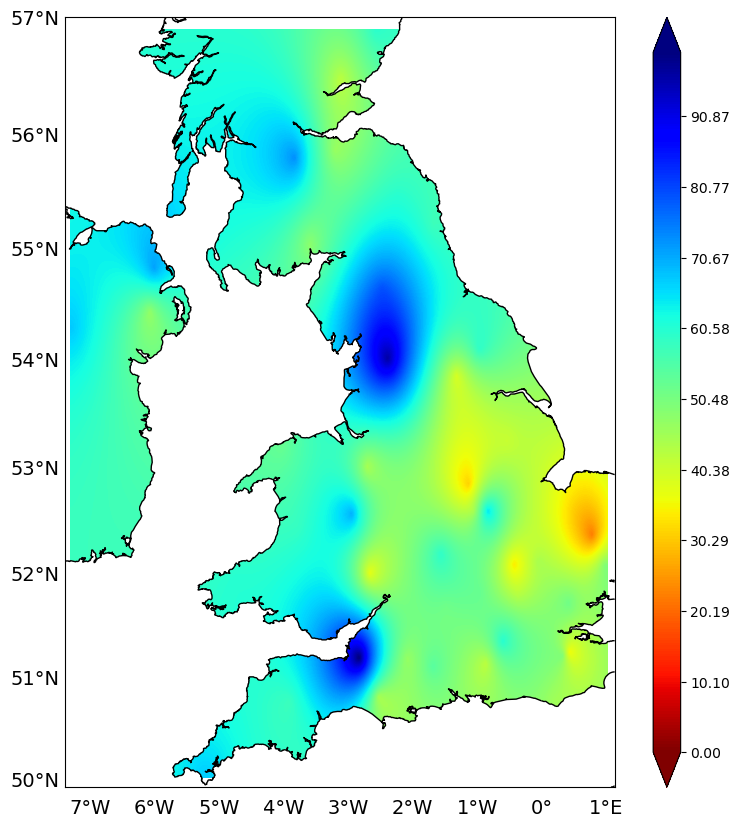

<Figure size 640x480 with 0 Axes>

In [18]:
xintrp, yintrp = np.meshgrid(gridx, gridy)
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(llcrnrlon=data[:,0].min()-0.1, llcrnrlat=data[:,1].min()-0.1, urcrnrlon=data[:,0].max()+0.1, urcrnrlat=data[:,1].max()+0.1, projection='merc', resolution='h', area_thresh=1000., ax=ax)
m.drawcoastlines()
x, y = m(xintrp, yintrp)
ln, lt = m(data[:,0], data[:,1])
cs = ax.contourf(x, y, z, np.linspace(0, 100, len(gridx)), extend='both', cmap='jet_r')
cbar = m.colorbar(cs, location='right', pad="7%")
parallels = np.arange(50.0, 59.0, 1.0)
m.drawparallels(parallels, labels=[1,0,0,0], fontsize=14, linewidth=0.0, dashes=(None,None))
meridians = np.arange(-7.0, 2.0, 1.0)
m.drawmeridians(meridians, labels=[0,0,0,1], fontsize=14, linewidth=0.0, dashes=(None,None))
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
map_edges = np.array([[x0, y0], [x1, y0], [x1, y1], [x0, y1]])
polys = [p.boundary for p in m.landpolygons]
polys = [map_edges] + polys
codes = [[Path.MOVETO] + [Path.LINETO for _ in p[1:]] for p in polys]
polys_lin = [v for p in polys for v in p]
codes_lin = [code for cs in codes for code in cs]
path = Path(polys_lin, codes_lin)
patch = PathPatch(path, facecolor='white', lw=0)
ax.add_patch(patch)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("./img/kriging.png", bbox_inches="tight", dpi=300)
#plt.show()  # To display the plot
#plt.savefig('kriging.png', dpi=300, bbox_inches='tight')  # To save the figure as a PNG file
#plt.close('all')

In [19]:
x

array([[ 11119.48742847,  12231.43617131,  13343.38491416, ...,
        934036.9439913 , 935148.89273415, 936260.841477  ],
       [ 11119.48742847,  12231.43617131,  13343.38491416, ...,
        934036.9439913 , 935148.89273415, 936260.841477  ],
       [ 11119.48742847,  12231.43617131,  13343.38491416, ...,
        934036.9439913 , 935148.89273415, 936260.841477  ],
       ...,
       [ 11119.48742847,  12231.43617131,  13343.38491416, ...,
        934036.9439913 , 935148.89273415, 936260.841477  ],
       [ 11119.48742847,  12231.43617131,  13343.38491416, ...,
        934036.9439913 , 935148.89273415, 936260.841477  ],
       [ 11119.48742847,  12231.43617131,  13343.38491416, ...,
        934036.9439913 , 935148.89273415, 936260.841477  ]],
      shape=(689, 833))

In [20]:
len(gridx)

833

In [21]:
len(gridy)

689

In [22]:
len(z)

689

In [23]:
np.savetxt("./foo.csv", z, delimiter=",")

In [24]:
dfOut = pd.read_csv('./foo.csv', header=None)

In [25]:
z

masked_array(
  data=[[58.170596662110036, 58.18610696992555, 58.20175486366831, ...,
         50.39738467342779, 50.42183217396141, 50.446476327863316],
        [58.17178838899774, 58.187296615309464, 58.202942435166655, ...,
         50.35529094147294, 50.38003074150044, 50.404969647389905],
        [58.1729126002104, 58.18841765106556, 58.20406028696608, ...,
         50.312953586786705, 50.337990205752256, 50.36322839786016],
        ...,
        [58.996098609276245, 59.006461144140665, 59.01682009107678, ...,
         55.99724594548469, 55.99525280276148, 55.993284362416134],
        [58.97712982979787, 58.987403172356856, 58.99767279132193, ...,
         56.001154789112945, 55.99916821761969, 55.997206169102995],
        [58.95826458123078, 58.96844934911242, 58.97863026126347, ...,
         56.005022667008745, 56.00304261941482, 56.00108691810497]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, F

In [29]:
dfOut

0          1          2          3          4          5    \
0    58.170597  58.186107  58.201755  58.217542  58.233468  58.249537   
1    58.171788  58.187297  58.202942  58.218727  58.234652  58.250718   
2    58.172913  58.188418  58.204060  58.219842  58.235763  58.251826   
3    58.173969  58.189470  58.205108  58.220886  58.236803  58.252862   
4    58.174959  58.190454  58.206087  58.221859  58.237771  58.253824   
..         ...        ...        ...        ...        ...        ...   
684  59.034347  59.044890  59.055430  59.065965  59.076497  59.087023   
685  59.015171  59.025623  59.036072  59.046517  59.056958  59.067394   
686  58.996099  59.006461  59.016820  59.027175  59.037525  59.047871   
687  58.977130  58.987403  58.997673  59.007938  59.018199  59.028455   
688  58.958265  58.968449  58.978630  58.988807  58.998979  59.009145   

           6          7          8          9    ...        823        824  \
0    58.265748  58.282103  58.298603  58.315250  ...  50.232265  50.255167   
1    58.266927  58.283280  58.299778  58.316423  ...  50.188206  50.211380   
2    58.268032  58.284382  58.300877  58.317518  ...  50.143873  50.167322   
3    58.269063  58.285408  58.301899  58.318536  ...  50.099265  50.122993   
4    58.270019  58.286359  58.302844  58.319475  ...  50.054382  50.078395   
..         ...        ...        ...        ...  ...        ...        ...   
684  59.097545  59.108060  59.118570  59.129073  ...  56.004053  56.001871   
685  59.077824  59.088248  59.098666  59.109078  ...  56.007994  56.005819   
686  59.058211  59.068544  59.078872  59.089192  ...  56.011892  56.009725   
687  59.038705  59.048948  59.059186  59.069416  ...  56.015750  56.013591   
688  59.019306  59.029461  59.039608  59.049749  ...  56.019568  56.017416   

           825        826        827        828        829        830  \
0    50.278308  50.301682  50.325283  50.349104  50.373140  50.397385   
1    50.234795  50.258447  50.282328  50.306433  50.330756  50.355291   
2    50.191016  50.214950  50.239117  50.263510  50.288125  50.312954   
3    50.146971  50.171191  50.195648  50.220335  50.245245  50.270373   
4    50.102660  50.127171  50.151923  50.176907  50.202118  50.227549   
..         ...        ...        ...        ...        ...        ...   
684  55.999713  55.997581  55.995474  55.993392  55.991335  55.989304   
685  56.003669  56.001544  55.999445  55.997370  55.995320  55.993296   
686  56.007583  56.005466  56.003374  56.001306  55.999264  55.997246   
687  56.011457  56.009347  56.007262  56.005202  56.003166  56.001155   
688  56.015289  56.013187  56.011109  56.009056  56.007027  56.005023   

           831        832  
0    50.421832  50.446476  
1    50.380031  50.404970  
2    50.337990  50.363228  
3    50.295711  50.321253  
4    50.253193  50.279044  
..         ...        ...  
684  55.987297  55.985316  
685  55.991296  55.989321  
686  55.995253  55.993284  
687  55.999168  55.997206  
688  56.003043  56.001087  

[689 rows x 833 columns]

In [30]:
dfFilt

SITE_ID  COSMOS_VWC    D86_1M    D86_5M   D86_25M   D86_75M  \
DATE_TIME                                                                
2024-02-25   ELMST        48.9  16.67349  16.47370  15.58631  14.00926   
2024-02-25   MORLY        35.4  16.03711  15.82683  14.89282  13.23292   
2024-02-25   MOREM        59.2  15.38037  15.21054  14.45619  13.11557   
2024-02-25   MOORH        68.0  23.32773  23.08212  21.99119  20.05244   
2024-02-25   LULLN        46.3  24.04033  23.74679  22.44298  20.12588   
2024-02-25   LODTN        64.2  15.45426  15.28996  14.56019  13.26325   
2024-02-25   HYBRY        47.4  23.83210  23.54686  22.27992  20.02834   
2024-02-25   HOLLN        54.6  18.56956  18.35688  17.41220  15.73334   
2024-02-25   HLACY        35.4  19.84736  19.58672  18.42901  16.37157   
2024-02-25   HILLB        48.1  17.95303  17.74039  16.79590  15.11739   
2024-02-25   HARTW        69.9  17.07938  16.90237  16.11615  14.71890   
2024-02-25   GLENS        66.0  40.11248  39.69183  37.82345  34.50302   
2024-02-25   GLENW        61.1  33.75790  33.39385  31.77684  28.90316   
2024-02-25   NWYKE        57.4  17.12706  16.93466  16.08004  14.56124   
2024-02-25   GISBN        85.4  19.65314  19.46454  18.62685  17.13812   
2024-02-25   FIVET        62.2  19.24407  19.03245  18.09252  16.42210   
2024-02-25   FINCH        29.2  20.83460  20.54535  19.26062  16.97745   
2024-02-25   EUSTN        23.4  24.23810  23.88720  22.32857  19.55865   
2024-02-25   EASTB        45.4  19.58380  19.34533  18.28611  16.40371   
2024-02-25   CRICH        47.8  18.14623  17.92976  16.96824  15.25948   
2024-02-25   HENFS        51.1  20.28201  20.04980  19.01839  17.18542   
2024-02-25   SOURH        58.2  29.19609  28.87081  27.42601  24.85837   
2024-02-25   HADLW        47.1  17.09533  16.89147  15.98598  14.37678   
2024-02-25   PLYNL        55.3  31.23116  30.87779  29.30824  26.51889   
2024-02-25   LIZRD        63.9  19.17782  18.97110  18.05292  16.42116   
2024-02-25   WADDN        51.0  17.78733  17.57923  16.65494  15.01233   
2024-02-25   WRTTL        50.9  16.02983  15.84281  15.01214  13.53590   
2024-02-25   WIMPL        47.5  17.21364  17.00743  16.09152  14.46379   
2024-02-25   PORTN        51.9  20.94866  20.70322  19.61307  17.67568   
2024-02-25   TADHM       100.0  46.56530  46.15733  44.34525  41.12489   
2024-02-25   SYDLG        46.5  18.06953  17.85213  16.88647  15.17035   
2024-02-25   STIPS        74.6  27.38655  27.10946  25.87872  23.69149   
2024-02-25   STGHT        40.0  17.16449  16.94807  15.98677  14.27839   
2024-02-25   ALIC1         NaN       NaN       NaN       NaN       NaN   
2024-02-25   BALRD        41.6  16.81322  16.60284  15.66838  14.00771   
2024-02-25   BICKL        42.8  17.27212  17.05545  16.09309  14.38282   
2024-02-25   SPENF        36.3  17.38216  17.15437  16.14261  14.34455   
2024-02-25   CARDT        36.9  20.71390  20.44774  19.26554  17.16458   
2024-02-25   REDHL        36.5  19.34846  19.09560  17.97247  15.97648   
2024-02-25   RISEH        38.8  18.04679  17.81873  16.80573  15.00546   
2024-02-25   BUNNY        28.0  18.23058  17.97539  16.84189  14.82746   
2024-02-25   SHEEP        51.1  18.63717  18.42314  17.47251  15.78307   
2024-02-25   COCLP        54.0  16.29929  16.11234  15.28198  13.80627   
2024-02-25   ROTHD        39.9  17.35377  17.13359  16.15562  14.41759   
2024-02-25   CHOBH        64.5  20.70738  20.47997  19.46987  17.67477   
2024-02-25   CHIMN        53.0  14.67623  14.50555  13.74744  12.40015   
2024-02-25   CGARW        55.3  20.26885  20.03867  19.01630  17.19938   

            D86_150M  D86_200M  CTS_MOD_CORR  SNOW  ...  \
DATE_TIME                                           ...   
2024-02-25  12.72658  12.27475    1690.64304   0.0  ...   
2024-02-25  11.88285  11.40728    1562.60001   0.0  ...   
2024-02-25  12.02520  11.64110    1472.22661   0.0  ...   
2024-02-25  18.47557  17.92011    1309.75601   0.0  ...   
2024-02-25  18.24129  17.57743

## Predict daily data in between COSMOS-UK stations

In [31]:
import numpy as np
import pandas as pd
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch

df = pd.read_csv('./Kriging_2024.csv')
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d/%m/%Y %H:%M')
df.set_index('DATE_TIME', inplace=True)
df = df.sort_index()

# Get unique indexes
indexes = df.index.unique()

# Get first 30 dates
#indexes = indexes[:30]

# Create dataframe for predicted time series
dfPred = pd.DataFrame(columns=['Date', 'SITE_ID', 'VWC', 'VWC_pred'])

# Loop through time steps
for idx in indexes:

    # Output index for progress
    print(idx)

    # Get unique site IDs
    sites = df['SITE_ID'].unique()

    # Set output grid
    gridx = np.arange(np.amin(df['LONGITUDE']), np.amax(df['LONGITUDE']), 0.01)
    gridy = np.arange(np.amin(df['LATITUDE']), np.amax(df['LATITUDE']), 0.01)
    
    # Filter out date
    dfFilt = df.loc[idx]    

    # Extract spatial coordinates and VWC
    dfData = dfFilt.loc[:, ['LONGITUDE', 'LATITUDE', 'COSMOS_VWC', 'SITE_ID']]

    try:
        # Drop any blank rows
        dfData.dropna(inplace=True)

        # Get data
        data = np.array(dfData)

        # Create ordinary kriging based on spatial data for time step
        OK = OrdinaryKriging(data[:,0], data[:,1], data[:,2], variogram_model='exponential', verbose=False, enable_plotting=False, pseudo_inv=True)
    
        # Execute ordinary kriging
        z, ss = OK.execute("grid", gridx, gridy)

        # Extract soil moisture for lon lat on grid (lat(y),lon(x))
        for site in sites:
            # Get records where == site
            row = df[(df['SITE_ID'] == site)]

            # Get longitude from 1st record
            lon = row.iloc[0].loc['LONGITUDE']

            # Get latitude from 1st record
            lat = row.iloc[0].loc['LATITUDE']

            row = dfFilt[(dfFilt['SITE_ID'] == site)]
            if len(row) == 0:
                vwc = np.nan
            else:
                vwc = row.iloc[0].loc['COSMOS_VWC']
                            
            x = int(((lon - np.amin(data[:,0])) / 0.01))
            y = int(((lat - np.amin(data[:,1])) / 0.01))
            dfRow = {'Date': idx, 'SITE_ID': site, 'VWC': vwc, 'VWC_pred': z[y, x]}
            dfPred = dfPred._append(dfRow, ignore_index=True)

    except ValueError:
        print('Failed to get data')

print("finished")


2024-01-01 00:00:00


/tmp/ipykernel_276624/1485009631.py:76: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfPred = dfPred._append(dfRow, ignore_index=True)


2024-01-02 00:00:00
2024-01-03 00:00:00
2024-01-04 00:00:00
2024-01-05 00:00:00
2024-01-06 00:00:00
2024-01-07 00:00:00
2024-01-08 00:00:00
2024-01-09 00:00:00
2024-01-10 00:00:00
2024-01-11 00:00:00
2024-01-12 00:00:00
2024-01-13 00:00:00
2024-01-14 00:00:00
2024-01-15 00:00:00
2024-01-16 00:00:00
2024-01-17 00:00:00
2024-01-18 00:00:00
2024-01-19 00:00:00
2024-01-20 00:00:00
2024-01-21 00:00:00
2024-01-22 00:00:00
2024-01-23 00:00:00
2024-01-24 00:00:00
2024-01-25 00:00:00
2024-01-26 00:00:00
2024-01-27 00:00:00
2024-01-28 00:00:00
2024-01-29 00:00:00
2024-01-30 00:00:00
2024-01-31 00:00:00
2024-02-01 00:00:00
2024-02-02 00:00:00
2024-02-03 00:00:00
2024-02-04 00:00:00
2024-02-05 00:00:00
2024-02-06 00:00:00
2024-02-07 00:00:00
2024-02-08 00:00:00
2024-02-09 00:00:00
2024-02-10 00:00:00
2024-02-11 00:00:00
2024-02-12 00:00:00
2024-02-13 00:00:00
2024-02-14 00:00:00
2024-02-15 00:00:00
2024-02-16 00:00:00
2024-02-17 00:00:00
2024-02-18 00:00:00
2024-02-19 00:00:00
2024-02-20 00:00:00


In [32]:
import numpy as np
import pandas as pd
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch

df = pd.read_csv('./Kriging_2024.csv')
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d/%m/%Y %H:%M')
df.set_index('DATE_TIME', inplace=True)
df = df.sort_index()

# Get unique indexes
indexes = df.index.unique()

# Get first 30 dates
#indexes = indexes[:30]

# Create dataframe for predicted time series
dfPred = pd.DataFrame(columns=['Date', 'SITE_ID', 'VWC', 'VWC_pred'])

# Loop through time steps
for idx in indexes:

    # Output index for progress
    print(idx)

    # Get unique site IDs
    sites = df['SITE_ID'].unique()

    # Set output grid
    gridx = np.arange(np.amin(df['LONGITUDE']), np.amax(df['LONGITUDE']), 0.01)
    gridy = np.arange(np.amin(df['LATITUDE']), np.amax(df['LATITUDE']), 0.01)
    
    # Filter out date
    dfFilt = df.loc[idx]    

    # Extract spatial coordinates and VWC
    dfData = dfFilt.loc[:, ['LONGITUDE', 'LATITUDE', 'COSMOS_VWC', 'SITE_ID']]

    # Drop sites
    dfData = dfData[(dfData['SITE_ID'] != 'EUSTN') & (dfData['SITE_ID'] != 'WADDN')]

    try:
        # Drop any blank rows
        dfData.dropna(inplace=True)

        # Get data
        data = np.array(dfData)

        # Create ordinary kriging based on spatial data for time step
        OK = OrdinaryKriging(data[:,0], data[:,1], data[:,2], variogram_model='exponential', verbose=False, enable_plotting=False, pseudo_inv=True)
    
        # Execute ordinary kriging
        z, ss = OK.execute("grid", gridx, gridy)

        # Extract soil moisture for lon lat on grid (lat(y),lon(x))
        for site in sites:
            # Get records where == site
            row = df[(df['SITE_ID'] == site)]

            # Get longitude from 1st record
            lon = row.iloc[0].loc['LONGITUDE']

            # Get latitude from 1st record
            lat = row.iloc[0].loc['LATITUDE']

            # Filter out date
            dfVWC = df.loc[idx]  
            
            row = dfVWC[(dfVWC['SITE_ID'] == site)]
            if len(row) == 0:
                vwc = np.nan
            else:
                vwc = row.iloc[0].loc['COSMOS_VWC']
                            
            x = int(((lon - np.amin(data[:,0])) / 0.01))
            y = int(((lat - np.amin(data[:,1])) / 0.01))
            dfRow = {'Date': idx, 'SITE_ID': site, 'VWC': vwc, 'VWC_pred': z[y, x]}
            dfPred = dfPred._append(dfRow, ignore_index=True)

    except ValueError:
        print('Failed to get data')

print("finished")


2024-01-01 00:00:00


/tmp/ipykernel_276624/4290279390.py:82: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfPred = dfPred._append(dfRow, ignore_index=True)


2024-01-02 00:00:00
2024-01-03 00:00:00
2024-01-04 00:00:00
2024-01-05 00:00:00
2024-01-06 00:00:00
2024-01-07 00:00:00
2024-01-08 00:00:00
2024-01-09 00:00:00
2024-01-10 00:00:00
2024-01-11 00:00:00
2024-01-12 00:00:00
2024-01-13 00:00:00
2024-01-14 00:00:00
2024-01-15 00:00:00
2024-01-16 00:00:00
2024-01-17 00:00:00
2024-01-18 00:00:00
2024-01-19 00:00:00
2024-01-20 00:00:00
2024-01-21 00:00:00
2024-01-22 00:00:00
2024-01-23 00:00:00
2024-01-24 00:00:00
2024-01-25 00:00:00
2024-01-26 00:00:00
2024-01-27 00:00:00
2024-01-28 00:00:00
2024-01-29 00:00:00
2024-01-30 00:00:00
2024-01-31 00:00:00
2024-02-01 00:00:00
2024-02-02 00:00:00
2024-02-03 00:00:00
2024-02-04 00:00:00
2024-02-05 00:00:00
2024-02-06 00:00:00
2024-02-07 00:00:00
2024-02-08 00:00:00
2024-02-09 00:00:00
2024-02-10 00:00:00
2024-02-11 00:00:00
2024-02-12 00:00:00
2024-02-13 00:00:00
2024-02-14 00:00:00
2024-02-15 00:00:00
2024-02-16 00:00:00
2024-02-17 00:00:00
2024-02-18 00:00:00
2024-02-19 00:00:00
2024-02-20 00:00:00


In [33]:
dfData

LONGITUDE   LATITUDE  COSMOS_VWC SITE_ID
DATE_TIME                                           
2024-07-10  -7.291954  54.298468        68.6   FIVET
2024-07-10  -2.384689  54.023711        97.0   GISBN
2024-07-10  -2.562155  56.914403        75.7   GLENS
2024-07-10  -4.012550  53.225198        53.8   HENFS
2024-07-10   0.320276  51.228582        38.6   HADLW
2024-07-10  -3.828995  55.810254        68.0   HARTW
2024-07-10   0.510728  52.617773        31.6   FINCH
2024-07-10  -6.004599  54.838087        70.3   GLENW
2024-07-10  -3.111488  56.482297        31.3   BALRD
2024-07-10  -3.207115  55.867392        43.2   EASTB
2024-07-10  -3.583386  55.043057        36.3   CRICH
2024-07-10  -1.694374  55.216013        50.4   COCLP
2024-07-10  -0.597484  51.367821        50.8   CHOBH
2024-07-10  -1.478766  51.708021        41.4   CHIMN
2024-07-10  -0.424644  52.105601        24.1   CARDT
2024-07-10  -1.126850  52.860730        21.8   BUNNY
2024-07-10  -2.700530  53.026350        38.5   BICKL
2024-07-10  -6.068526  54.446959        43.6   HILLB
2024-07-10   0.993065  52.094647        46.2   ELMST
2024-07-10  -2.662105  52.020880        28.8   HLACY
2024-07-10  -0.044411  52.132078        40.7   WIMPL
2024-07-10  -2.079616  51.202770        37.3   HYBRY
2024-07-10  -2.828810  51.207417        72.4   TADHM
2024-07-10  -2.527891  50.828373        39.6   SYDLG
2024-07-10  -2.944686  52.581248        58.9   STIPS
2024-07-10  -1.047046  52.601667        38.1   STGHT
2024-07-10  -1.318860  53.868860        38.8   SPENF
2024-07-10  -1.481903  51.530244        39.4   SHEEP
2024-07-10  -0.378304  51.813787        37.9   ROTHD
2024-07-10  -0.959477  54.110665        46.7   HOLLN
2024-07-10  -0.525907  53.261647        34.1   RISEH
2024-07-10  -1.681482  51.120071        45.9   PORTN
2024-07-10  -3.762572  52.453337        65.5   PLYNL
2024-07-10  -3.905963  50.773479        44.5   NWYKE
2024-07-10   1.034231  52.548146        30.0   MORLY
2024-07-10  -1.563081  52.199407        44.2   MOREM
2024-07-10  -2.467800  54.659417        88.1   MOORH
2024-07-10   0.188870  50.793720        35.1   LULLN
2024-07-10  -0.826419  52.610159        54.6   LODTN
2024-07-10  -5.199990  50.032660        49.6   LIZRD
2024-07-10   0.429135  51.262870        29.6   REDHL
2024-07-10  -0.858232  51.153551        35.2   ALIC1

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [34]:
dfPred.set_index('Date', inplace=True)

In [35]:
dfPred

SITE_ID   VWC   VWC_pred
Date                               
2024-01-01   NWYKE  57.8  57.820658
2024-01-01   CHOBH  60.0  59.640365
2024-01-01   COCLP  57.8  57.942139
2024-01-01   CRICH  47.8  48.016529
2024-01-01   EASTB  46.7  46.935637
...            ...   ...        ...
2024-07-10   SPENF  38.8  38.878102
2024-07-10   ROTHD  37.9  37.905877
2024-07-10   ALIC1  35.2  35.248710
2024-07-10   STIPS  58.9  58.700741
2024-07-10   BALRD  31.3  31.624299

[9024 rows x 3 columns]

## Plot timeseries of daily data predicted vs actual values for each COSMOS-UK site

/users/global/timhow/miniconda3/envs/kriging_fresh/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


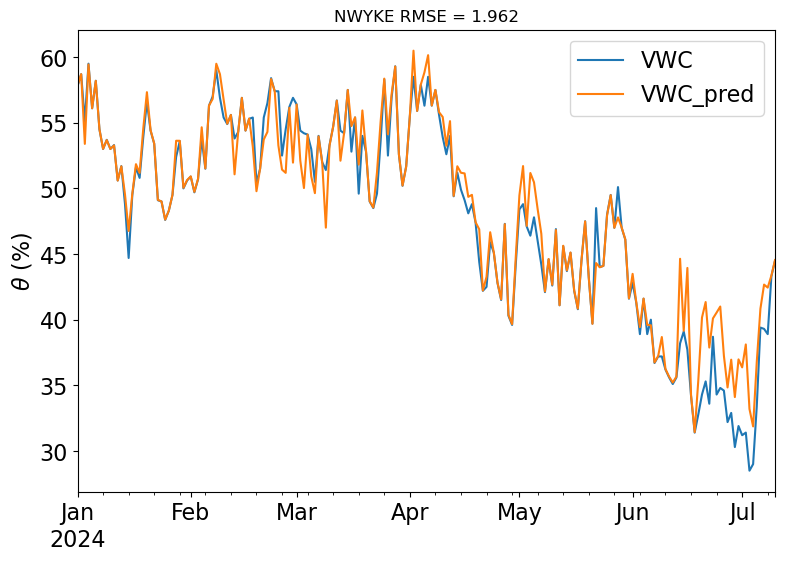

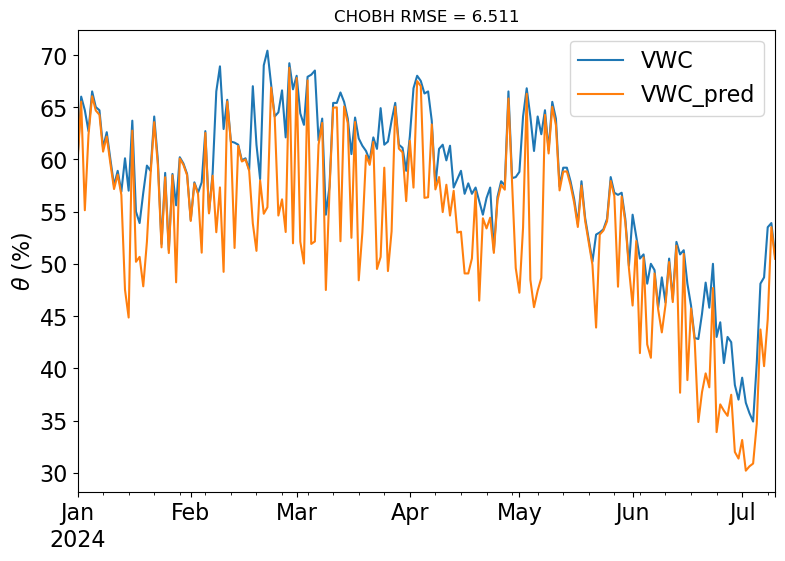

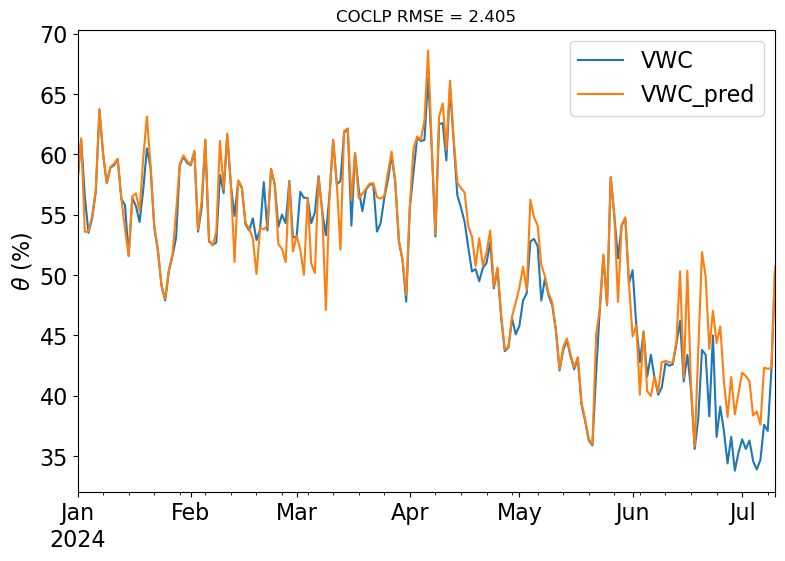

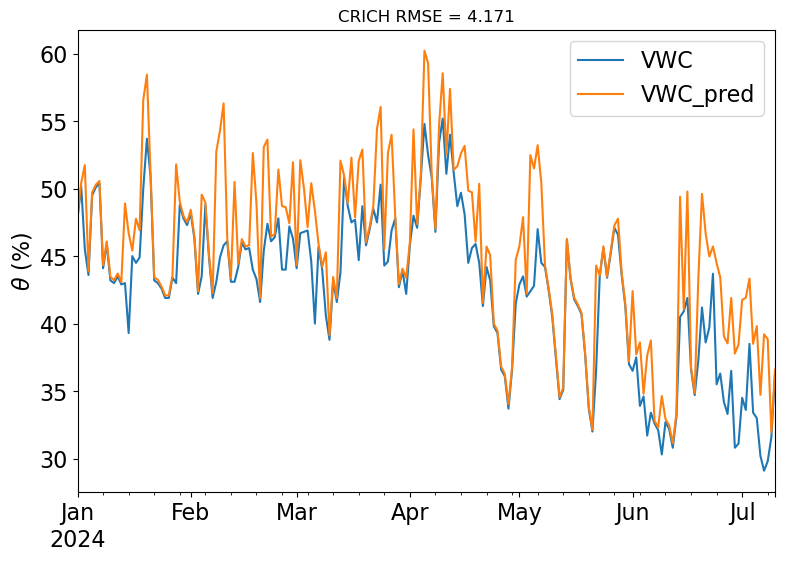

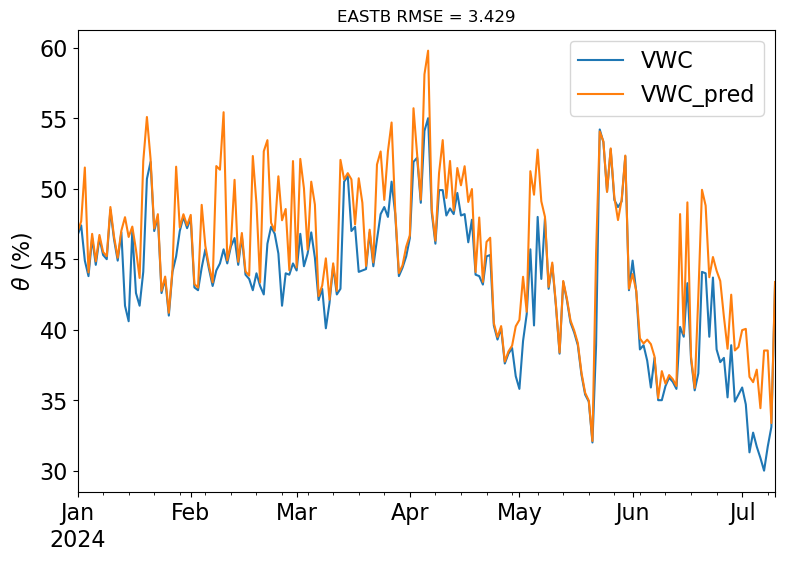

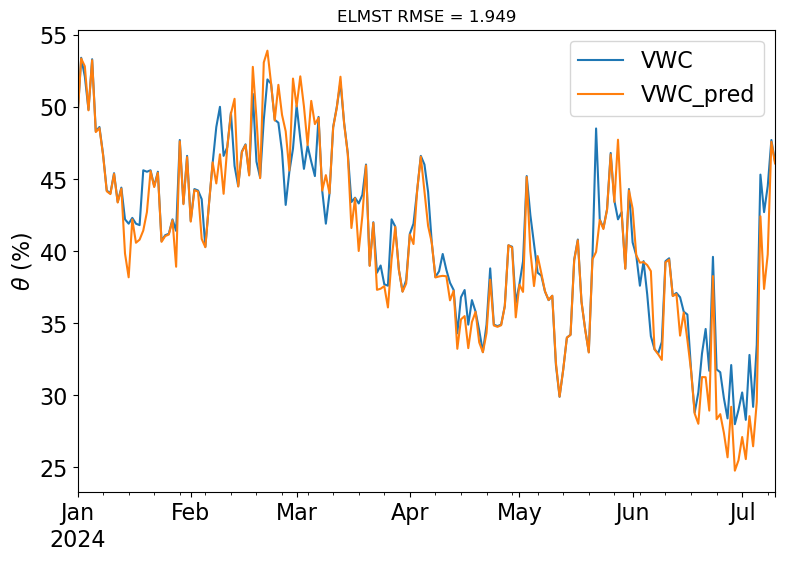

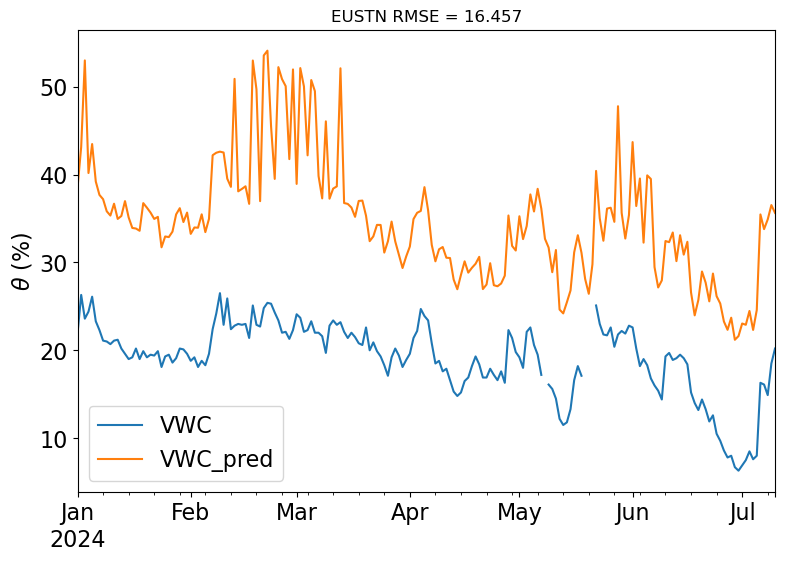

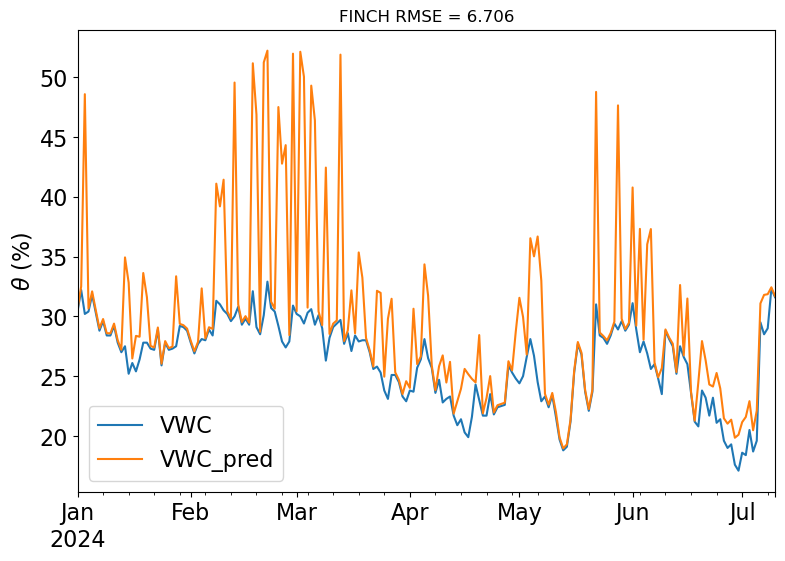

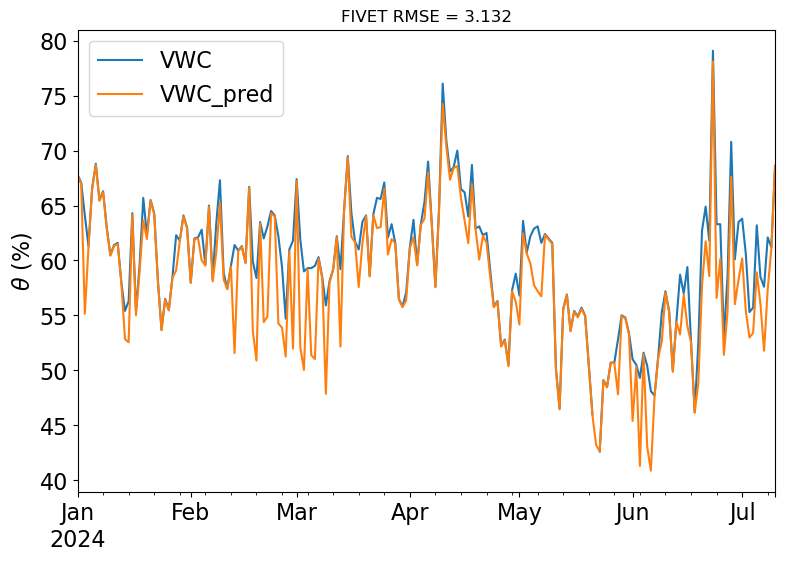

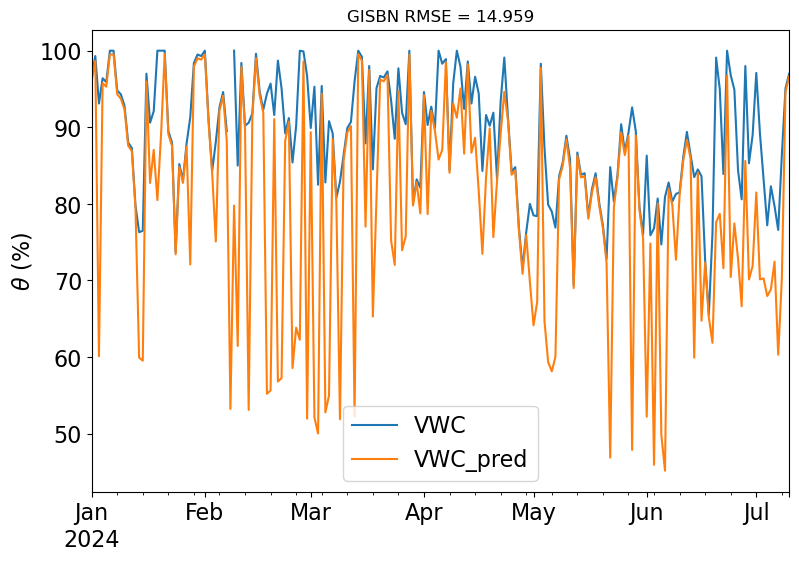

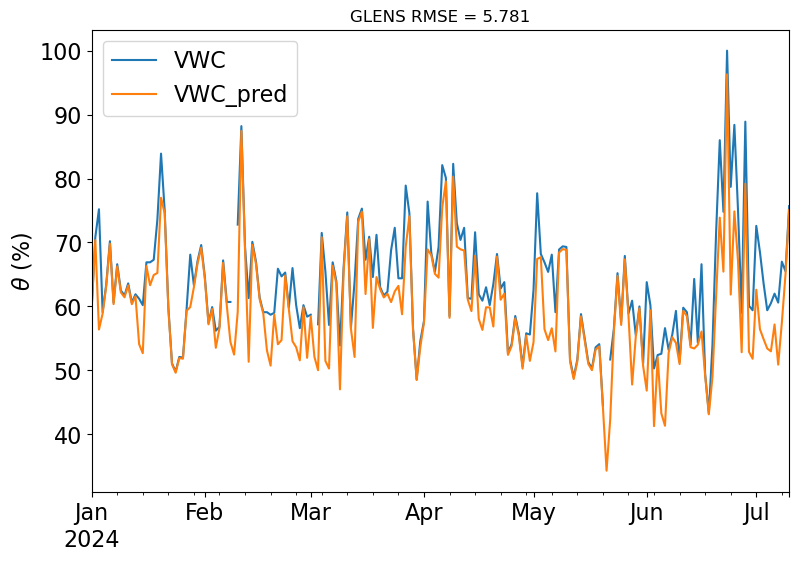

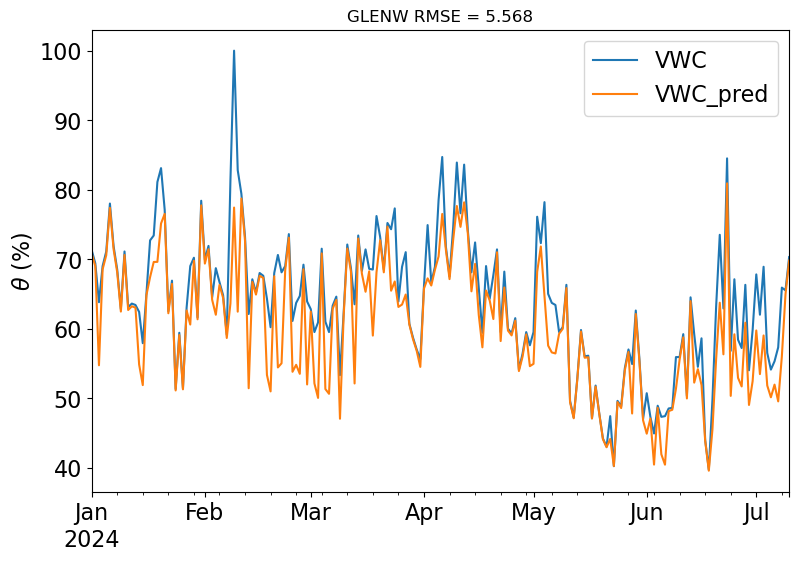

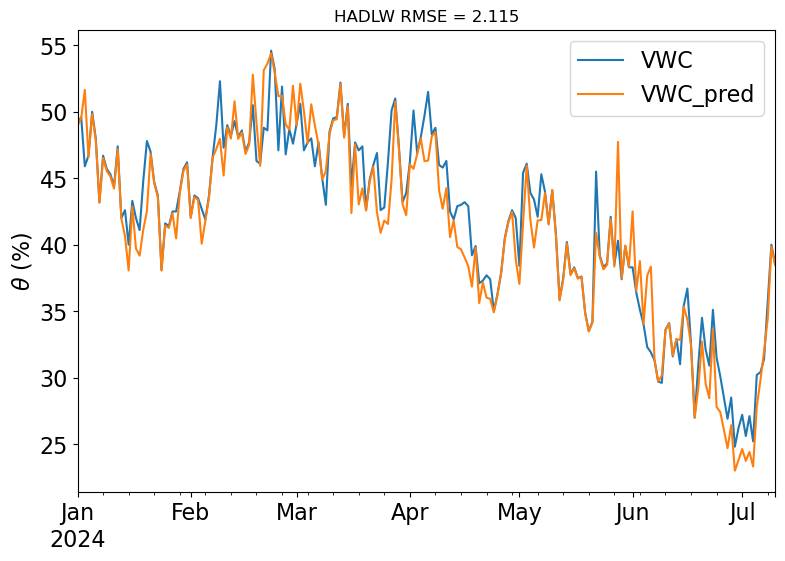

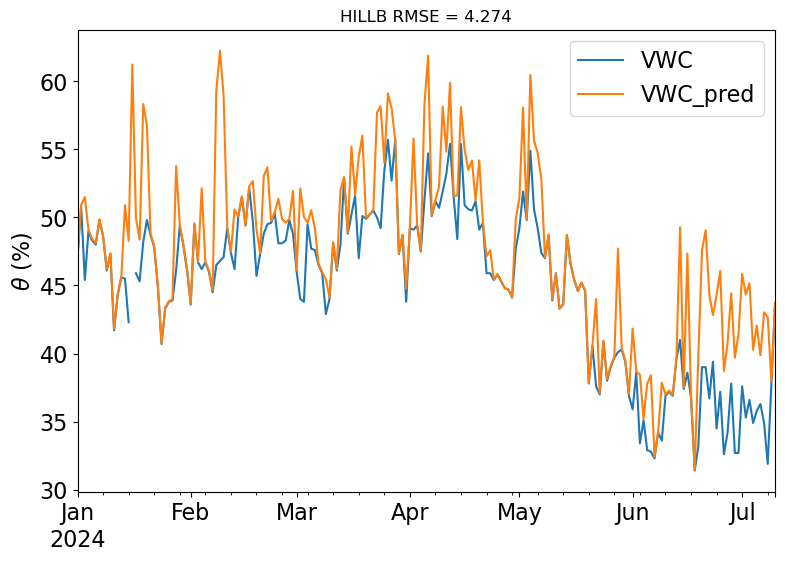

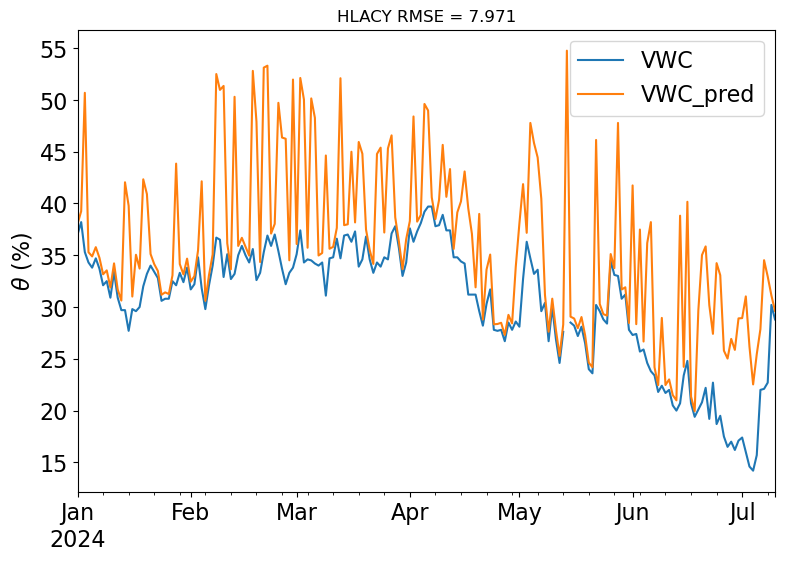

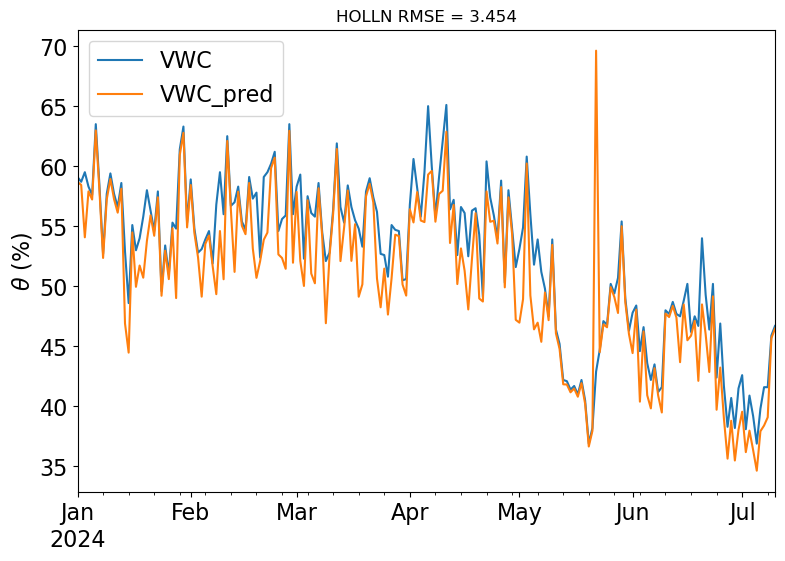

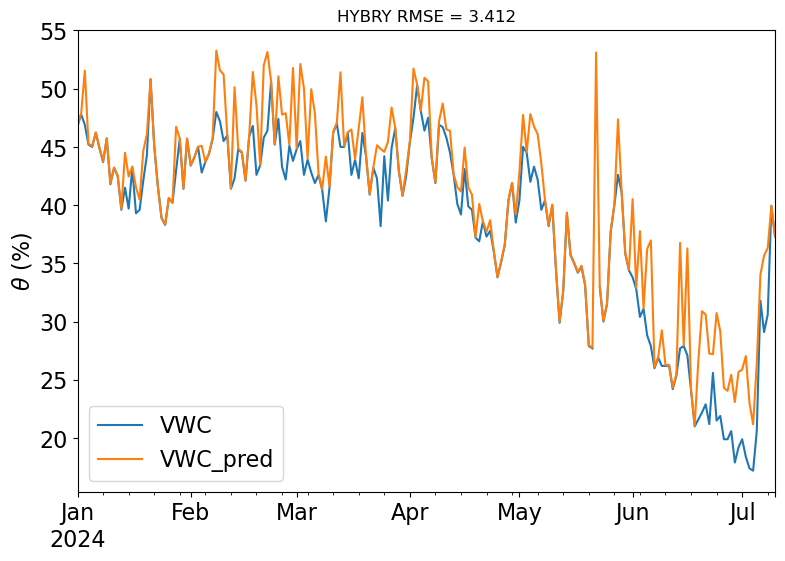

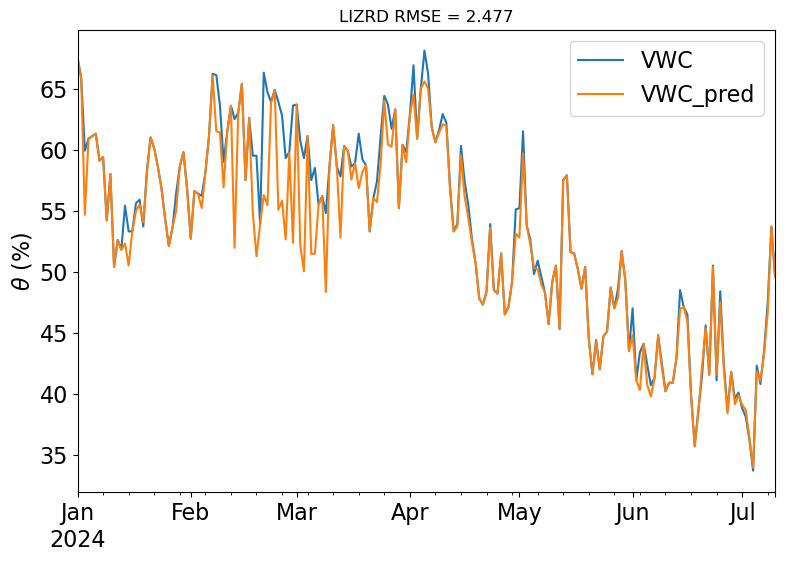

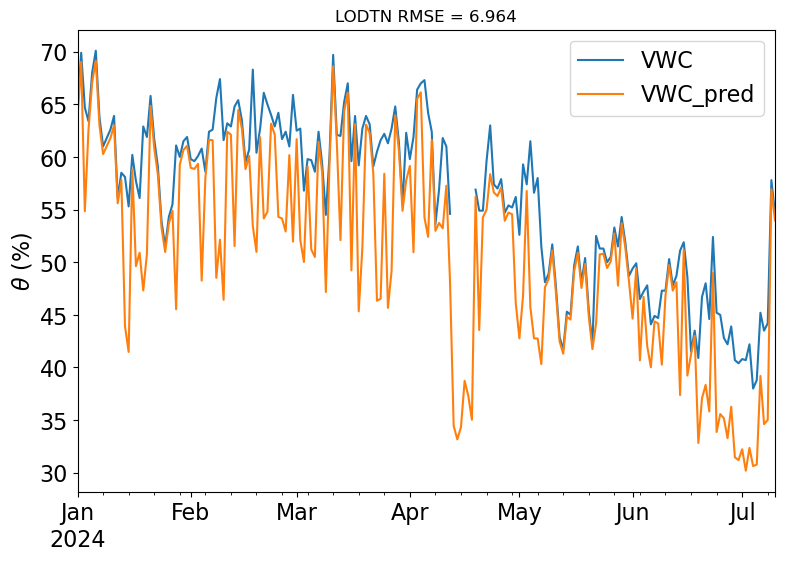

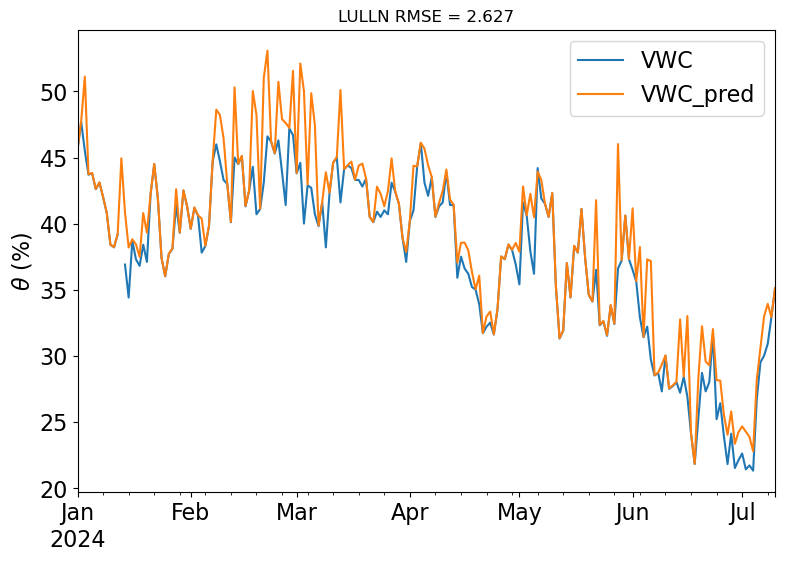

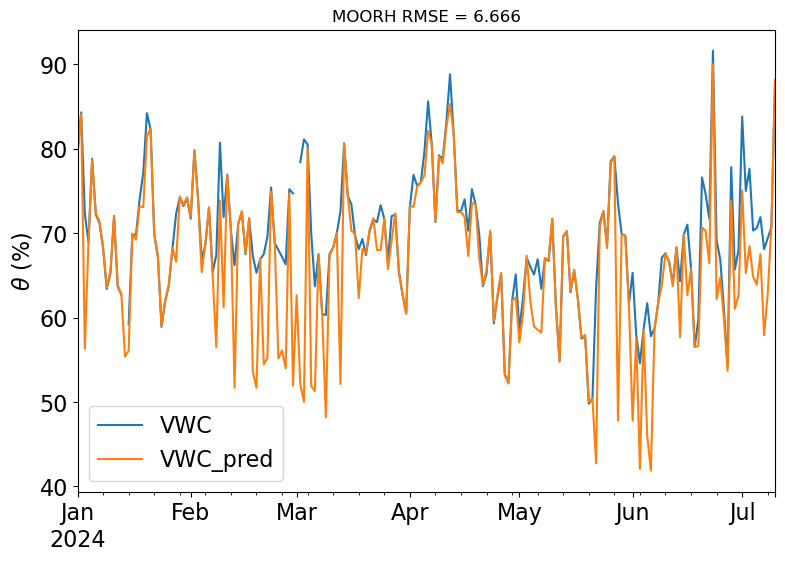

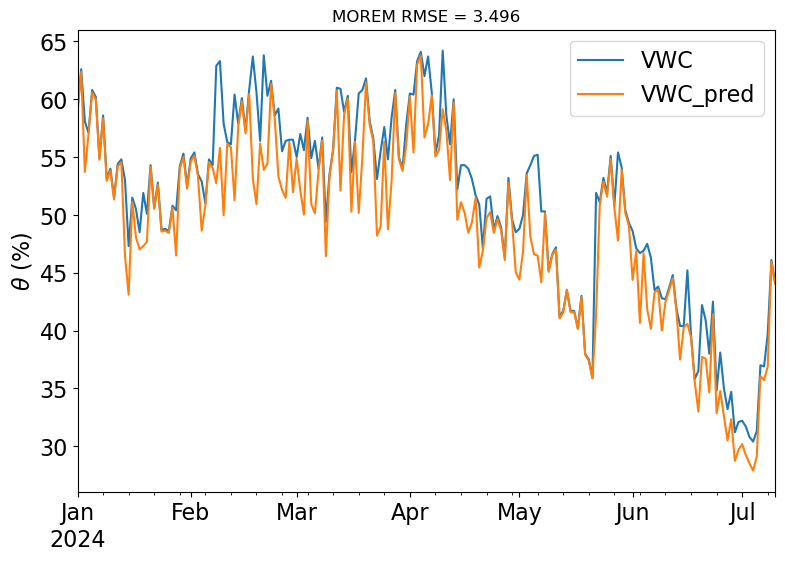

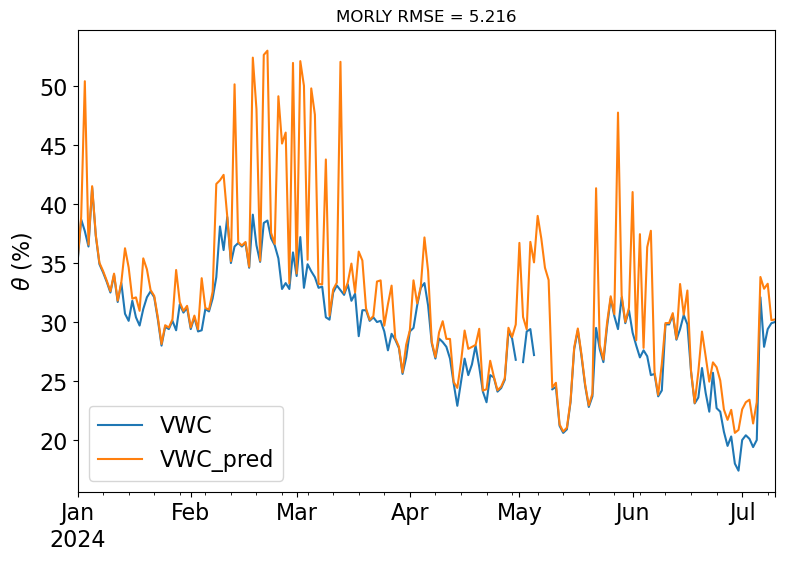

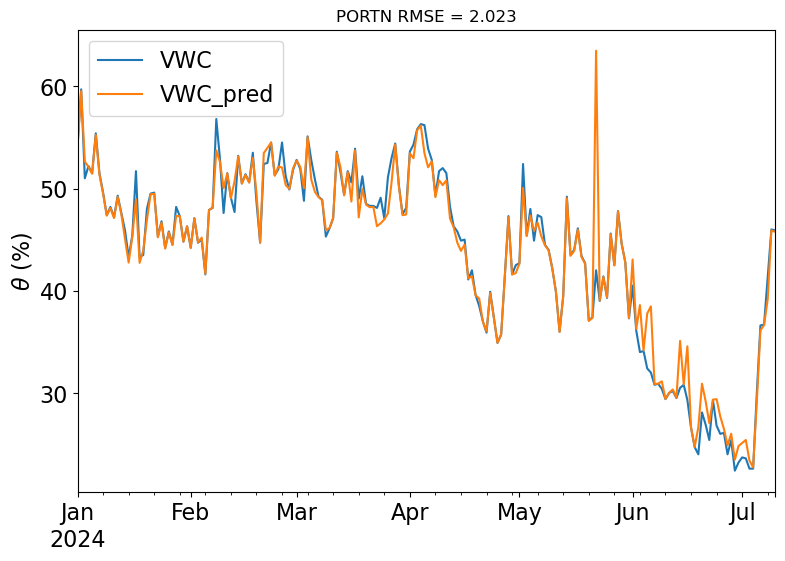

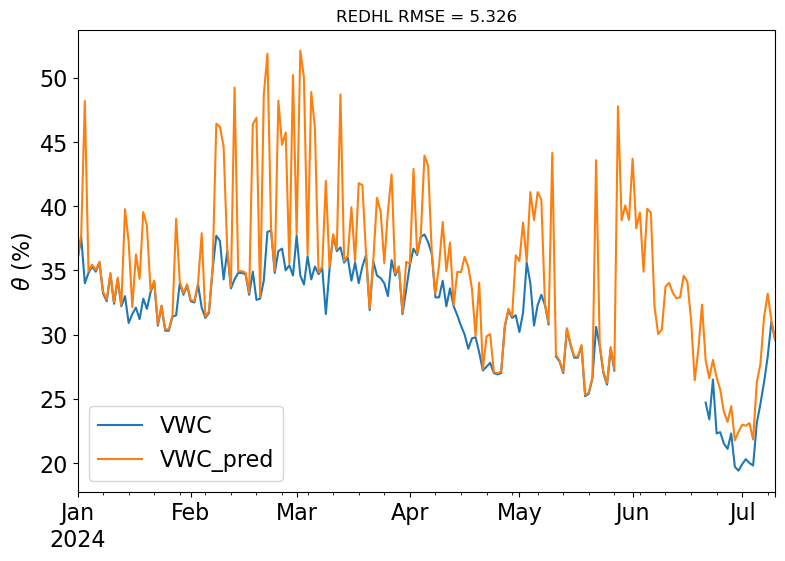

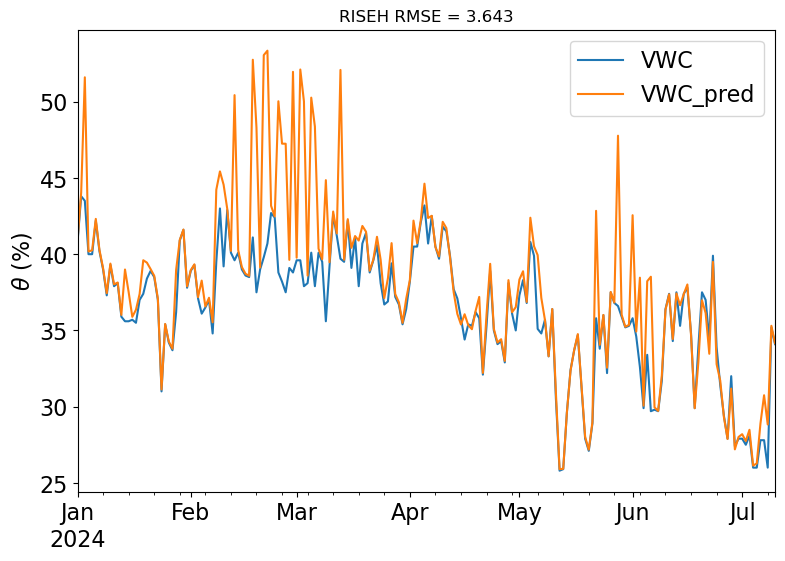

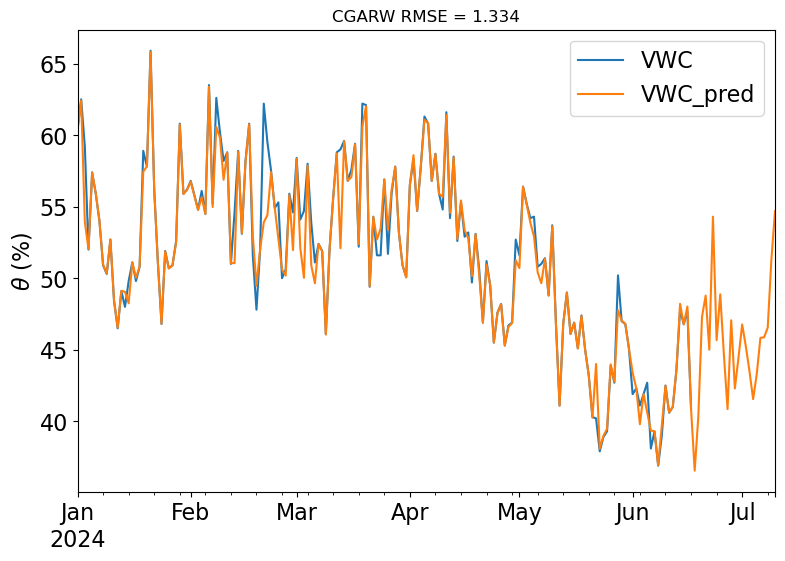

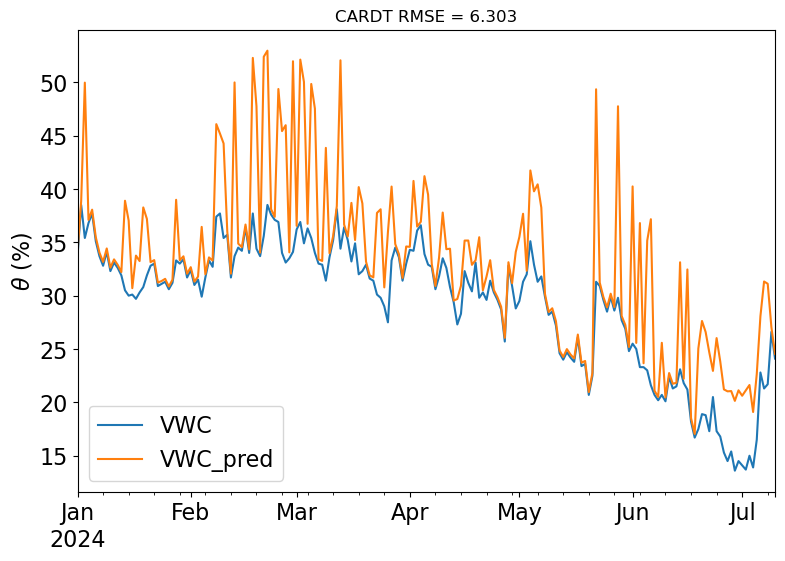

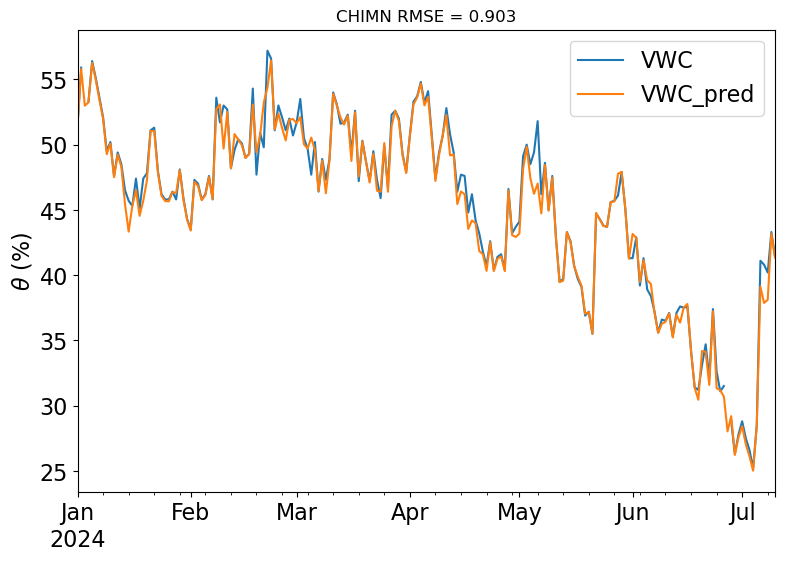

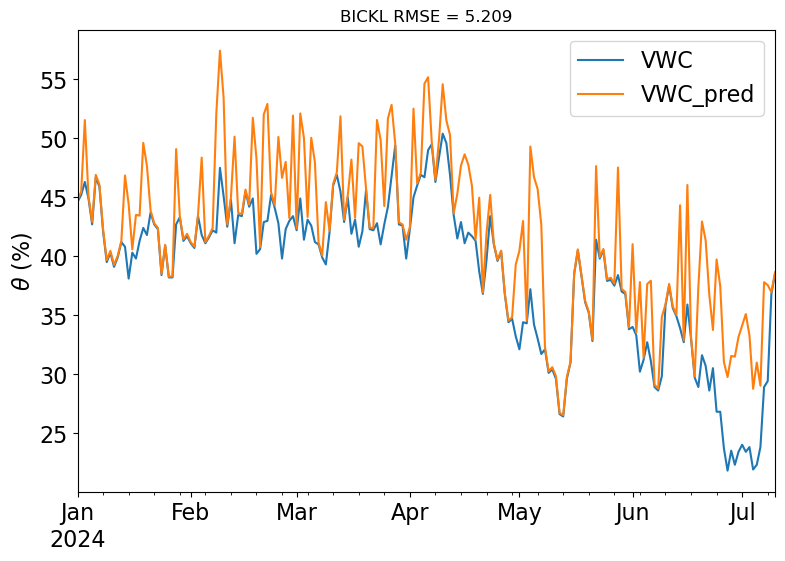

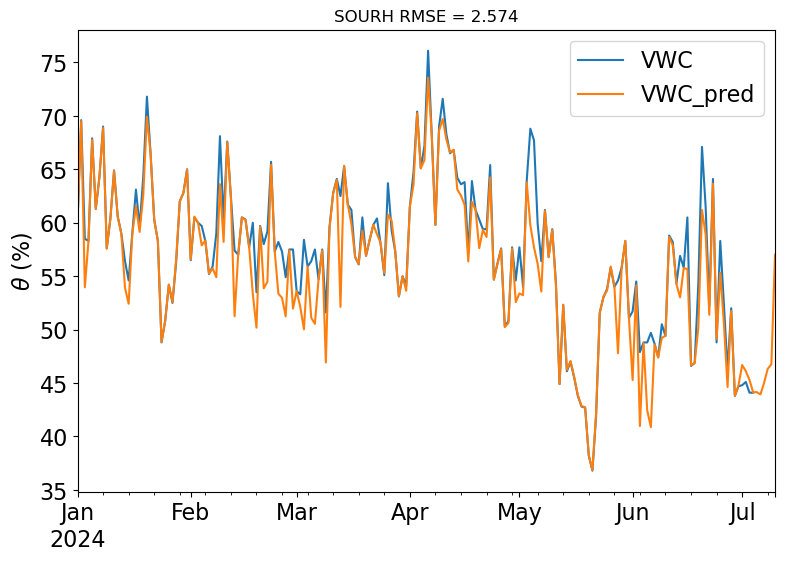

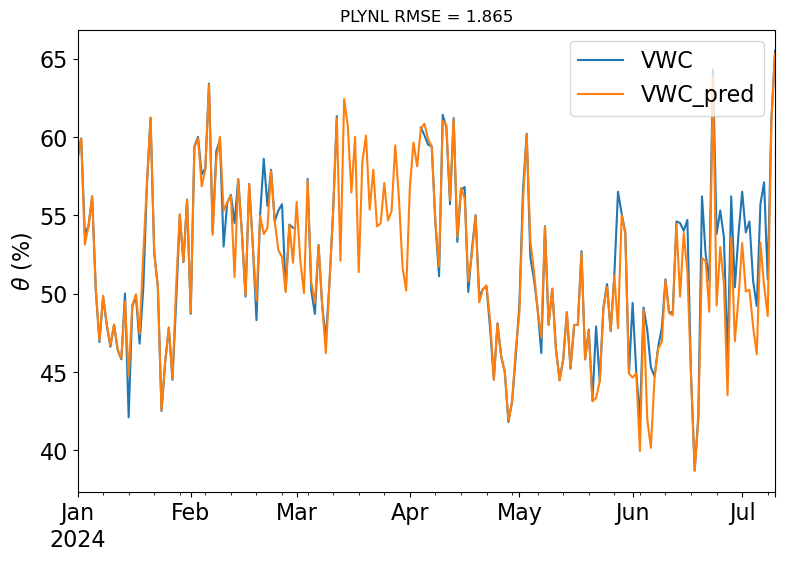

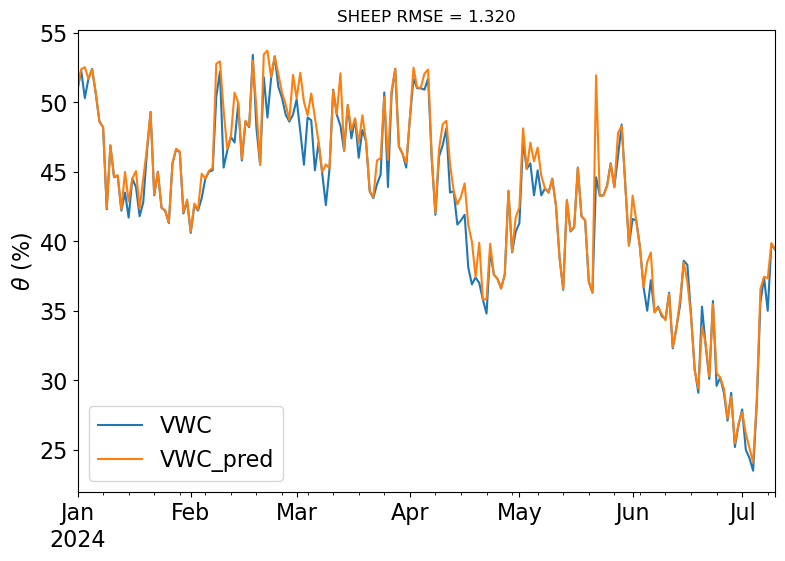

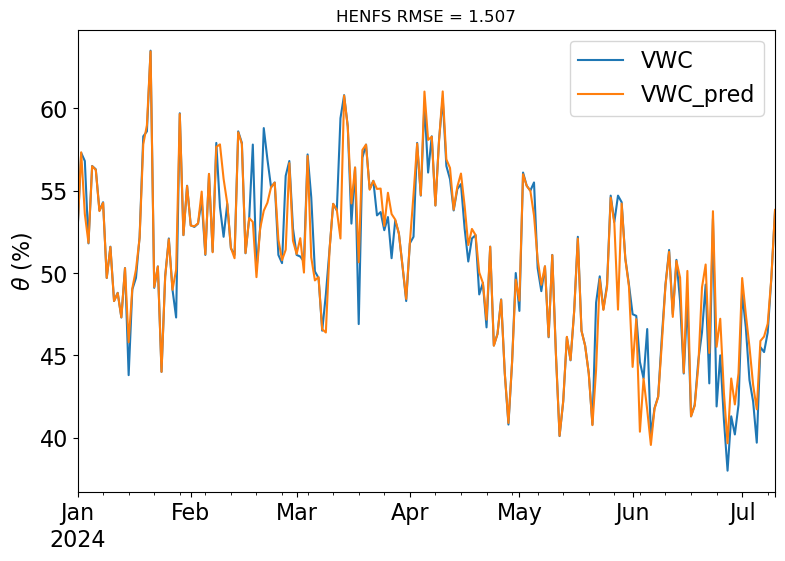

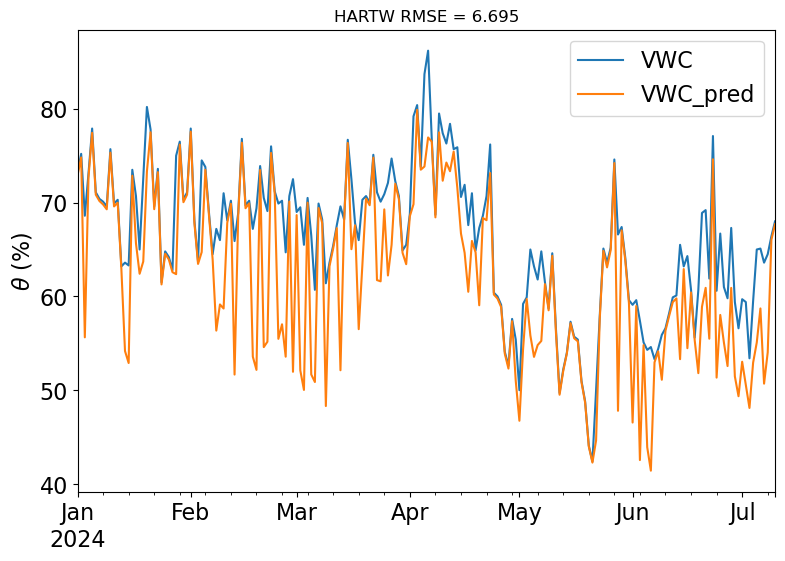

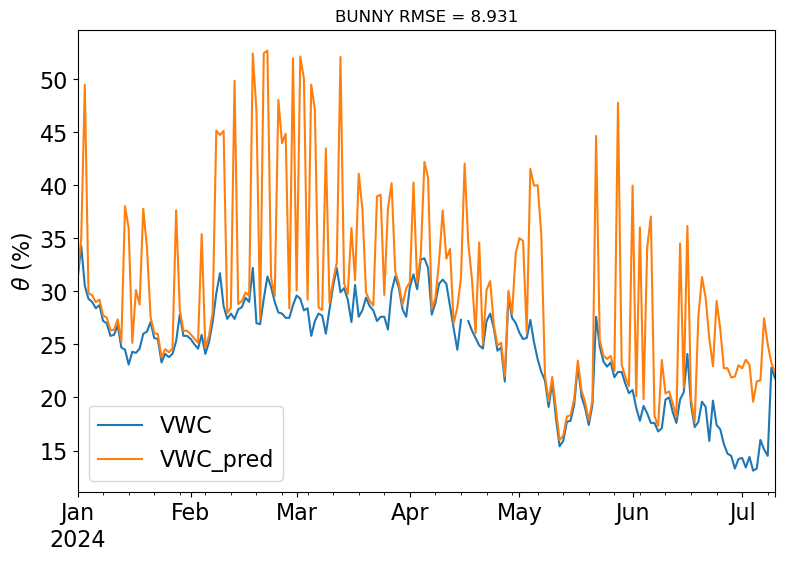

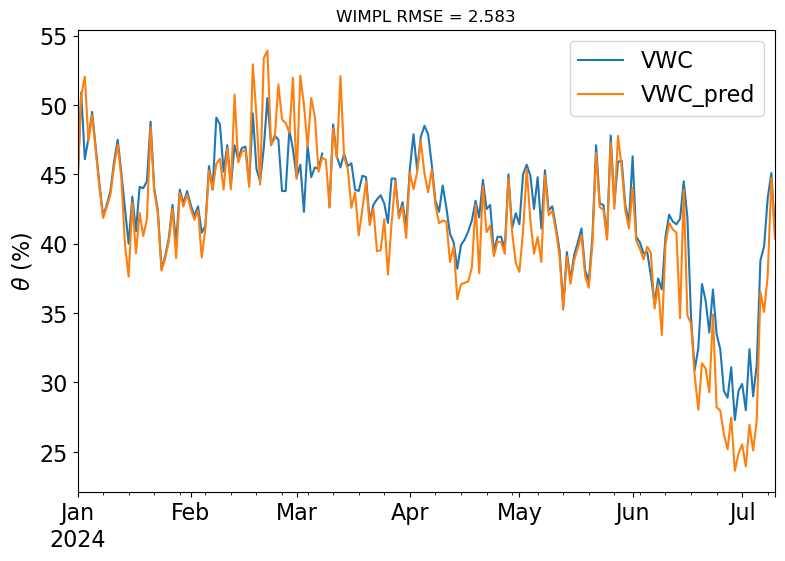

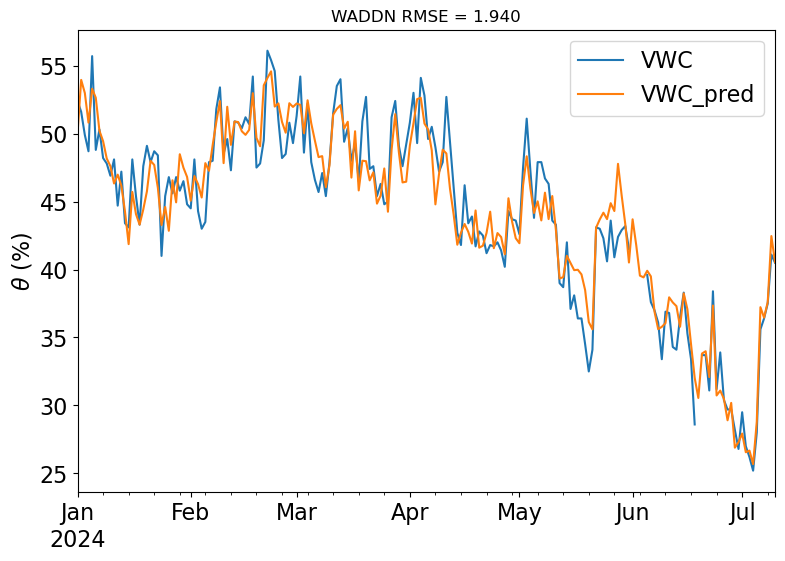

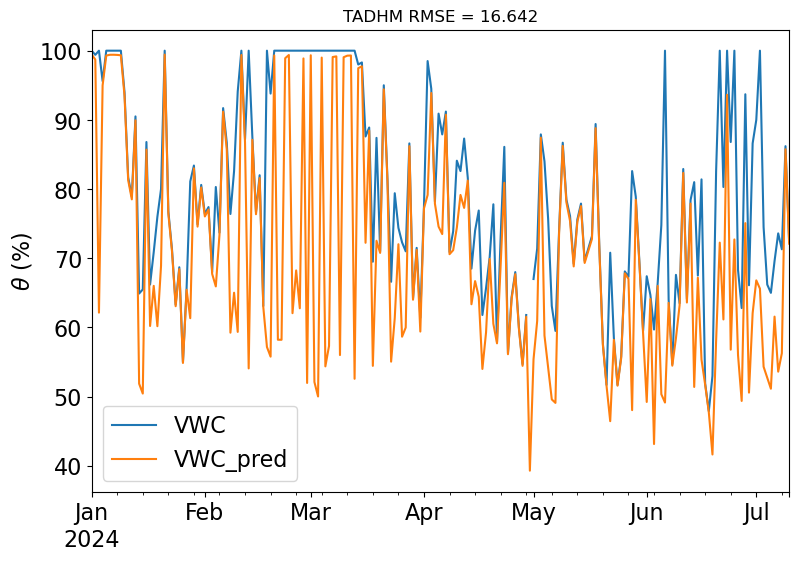

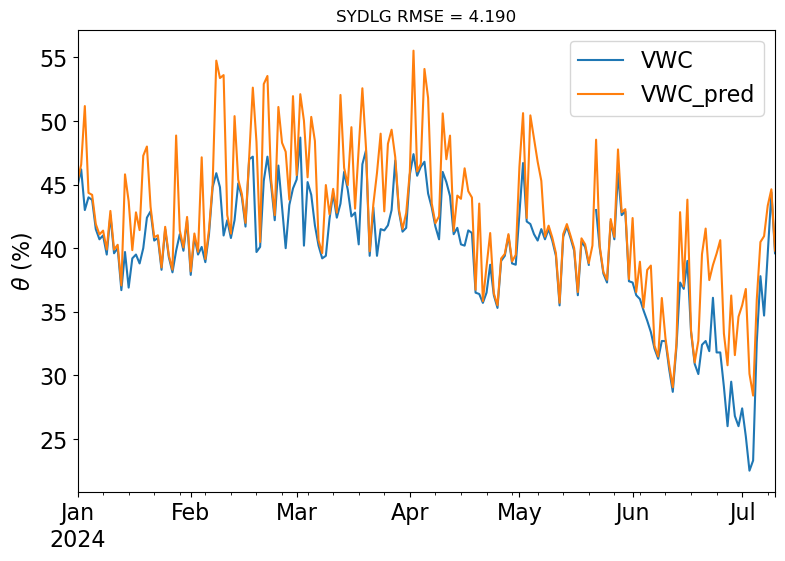

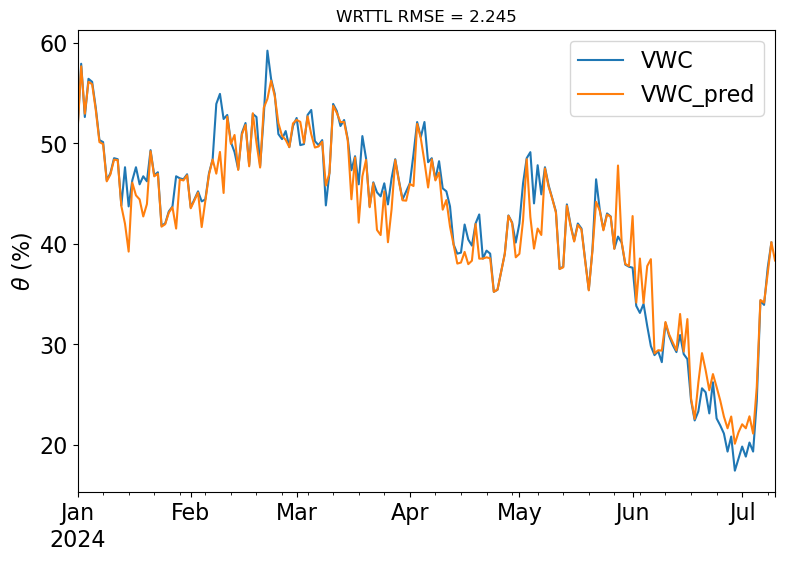

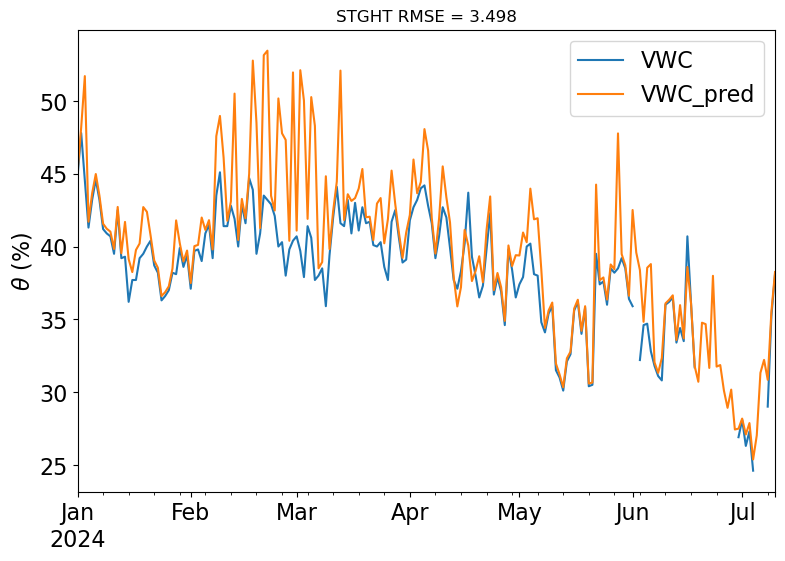

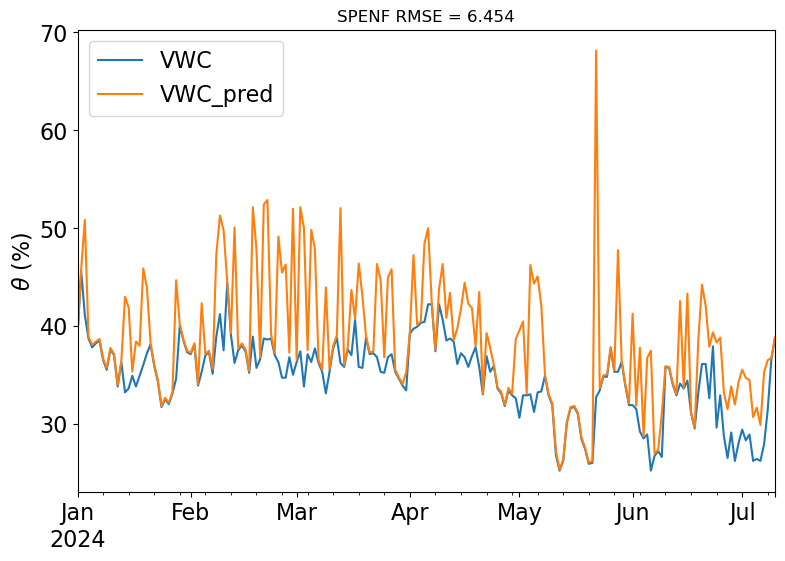

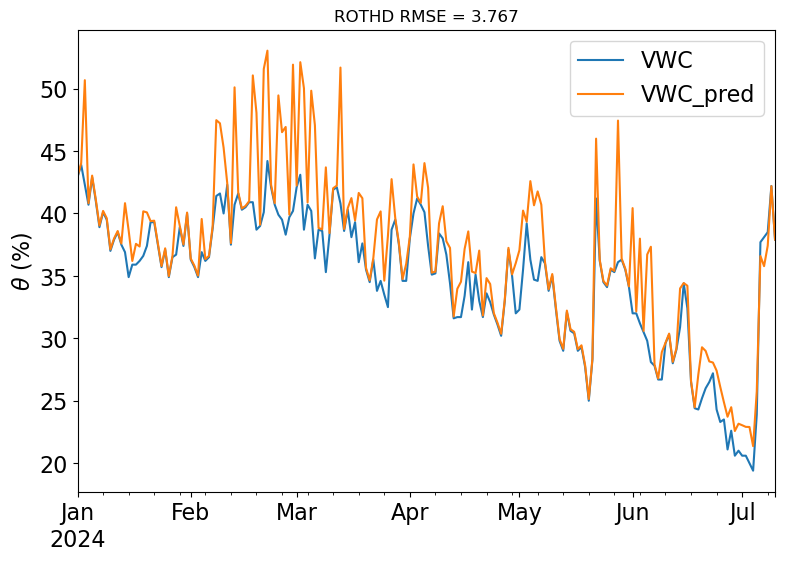

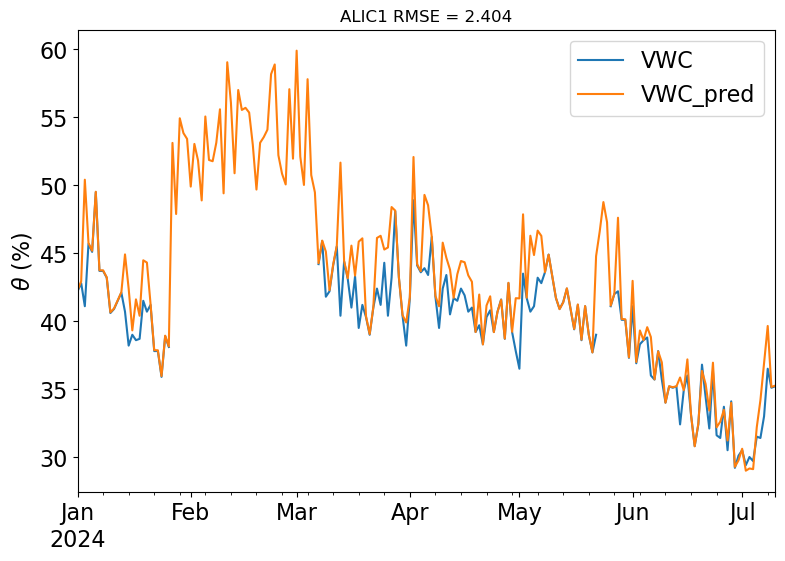

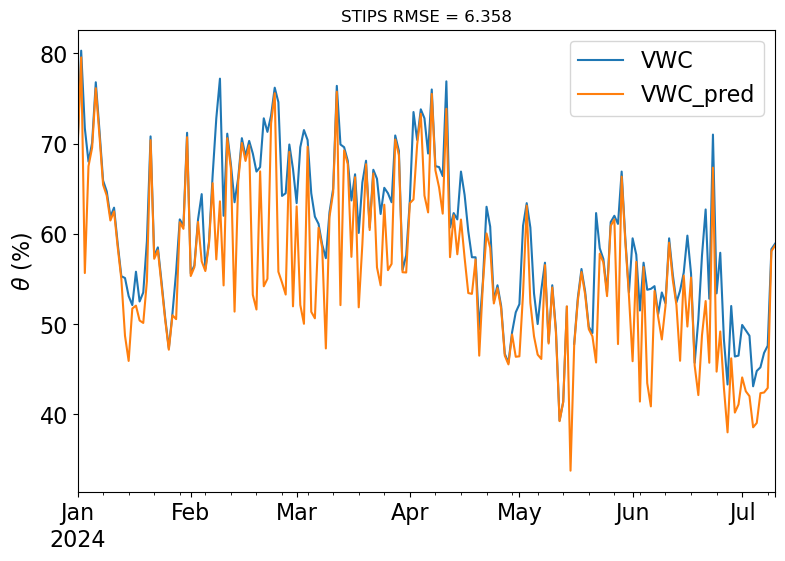

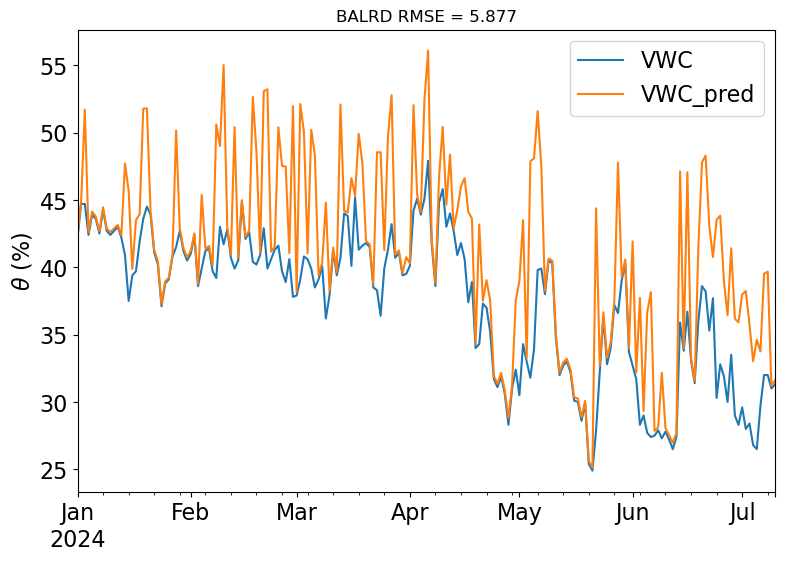

In [36]:
import math as math

sites = dfPred['SITE_ID'].unique()
total = 0

for site in sites:
    dfSite = dfPred[(dfPred["SITE_ID"] == site)]
    MSE = np.nanmean(np.square(np.subtract(dfSite['VWC'], dfSite['VWC_pred'])))
    RMSE = math.sqrt(MSE)
    total = total + RMSE
    dfSite[['VWC', 'VWC_pred']].plot(title=site+" RMSE = {:.3f}".format(RMSE), fontsize=16, figsize=(9,6))
    plt.legend(fontsize = 16), plt.ylabel(r'$\theta$ (%)',fontsize = 16), plt.xlabel('')
    plt.savefig('./'+site+'_krig.png')

RMSE_mean = total / len(sites)